In [234]:
### import libraries
import pandas as pd
import numpy as np
import os as os
import datetime as dt
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import binarize
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

In [235]:
#Set working directory
os.chdir("/Users/halliebregman/Dropbox/Kaggle")

In [236]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
prod = pd.read_csv("product_descriptions.csv")
sample = pd.read_csv("sample_submission.csv")

In [237]:
print train.head()

   id  product_uid                                      product_title  \
0   2       100001                  Simpson Strong-Tie 12-Gauge Angle   
1   3       100001                  Simpson Strong-Tie 12-Gauge Angle   
2   9       100002  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...   
3  16       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
4  17       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   

          search_term  relevance  
0       angle bracket       3.00  
1           l bracket       2.50  
2           deck over       3.00  
3    rain shower head       2.33  
4  shower only faucet       2.67  


In [238]:
#Merge train and product descriptions
train = pd.DataFrame.merge(train, prod, on="product_uid", how='left')
#train = train[np.isfinite(train.id)]

In [239]:
#Merge test and product descriptions
test = pd.DataFrame.merge(test, prod, on="product_uid", how='left')
#test = test[np.isfinite(test.id)]

In [240]:
match = []
for i in range(len(train)):
    if train['search_term'][i] in train['product_title'][i]:
        match.append(True)
    else:
        match.append(False)

In [241]:
match_t = []
for i in range(len(test)):
    if test['search_term'][i] in test['product_title'][i]:
        match_t.append(True)
    else:
        match_t.append(False)

In [242]:
match2 = []
for i in range(len(train)):
    if train['search_term'][i] in train['product_description'][i]:
        match2.append(True)
    else:
        match2.append(False)

In [243]:
match2_t = []
for i in range(len(test)):
    if test['search_term'][i] in test['product_description'][i]:
        match2_t.append(True)
    else:
        match2_t.append(False)

In [244]:
train['match'] = match
train['match2'] = match2
train['match3'] = (match==True) & (match2==True)

In [245]:
test['match'] = match_t
test['match2'] = match2_t
test['match3'] = (match_t==True) & (match2_t==True)

In [246]:
train[(train.match==True) & (train.match2==True)]

,id,product_uid,product_title,search_term,relevance,product_description,match,match2,match3
1033,3241,100571,Cooper Bussmann AGC Series 5 Amp Silver Electr...,Fuses,3.00,The Cooper Bussmann AGC Series 5 Amp Silver El...,True,True,False
1063,3333,100588,Cooper Bussmann AGC Series 3 Amp Silver Automo...,Fuses,2.67,The Cooper Bussmann AGC Series 3 Amp Silver Au...,True,True,False
2412,7388,101260,Husky 1.8 ft. x 3 ft. Portable Jobsite Workbench,table,3.00,The Husky 1500 lbs. portable work table can be...,True,True,False
4191,13159,102295,HDX 150-Watt Incandescent Clamp Light,lamp,2.33,This HDX 150-Watt Incandescent Clamp Light is ...,True,True,False
4502,14142,102466,Edsal 33 in. Adjustable Height Workbench Legs,table,1.00,These industrial grade Edsal Adjustable Height...,True,True,False
4543,14257,102489,Cooper Bussmann FNM Series 10 Amp Midget Fuses...,Fuses,3.00,The Cooper Bussmann FNM Series 10 Amp Midget F...,True,True,False
5541,17425,103076,Acurio Latticeworks 1/4 in. x 32 in. x 4 ft. B...,Acurio,2.33,Acurio Latticeworks decorative panels combine ...,True,True,False
5813,18259,103244,Cooper Bussmann ABC Series 20 Amp Fast-Act Mic...,Fuses,2.67,The Cooper Bussmann ABC Series 20 Amp Fast-Act...,True,True,False
6398,20070,103654,Legrand adorne 1-Gang 3 Module Wall Plate - Gr...,adorne,2.00,Your re-model looks like a million bucks. It d...,True,True,False
6680,20924,103882,Kidde 2-in-1 Battery Operated Wireless-Interco...,Smoke and Carbon Monoxide,2.67,Monoxide Alarm provides two important safety d...,True,True,False


0.532819469844
  features  estimatedCoefficients
0   match2                      1


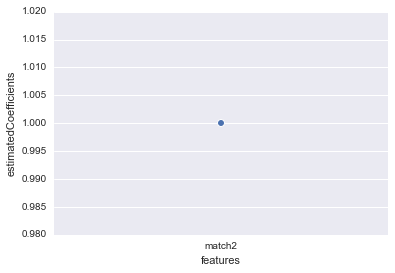

In [247]:
X = train[['match2']]
y = train[['relevance']]
y = np.squeeze(y)

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# instantiate the model 
knn = RandomForestRegressor()

# fit the model with data
knn.fit(X_train, y_train)

# predict the response for new observations
y_pred = knn.predict(X_test)
#y_pred[X_test.totV1 == 0] = 1

print np.sqrt(-cross_val_score(knn, X_train, y_train, cv=10, scoring='mean_squared_error')).mean()

coefs = pd.DataFrame(zip(X.columns, knn.feature_importances_), columns=['features', 'estimatedCoefficients'])
print coefs
#print knn.feature_importances_
sns.stripplot(x="features", y="estimatedCoefficients", data=coefs);

In [248]:
#Define train
X_train = train[['match2']]
y_train = train[['relevance']]
y_train = np.squeeze(y_train)

#Define test
X_test = test[['match2']]

# instantiate the model 
knn = RandomForestRegressor()

# fit the model with data
knn.fit(X_train, y_train)

# predict the response for new observations
y_pred = knn.predict(X_test)

In [ ]:
#Attach predicted values to test set
for i in range(len(y_pred)):
    test['y_pred'] = y_pred[i]

In [ ]:
test

In [ ]:
plt.plot(test['y_pred'])

In [ ]:
test = test.drop(["match", "match2", "match3", "relevance"], axis=1)

In [ ]:
test.columns = ['id', 'relevance']

In [ ]:
test.to_csv("test2.csv")

In [ ]:
tweets_by_lang = train['search_term'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
#ax.set_y_axis(0, 30)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:20].plot(ax=ax, kind='bar', color='red')

In [ ]:
import re

In [ ]:
words = []
word_lower = []
for i in range(len(train)):
    words.append(train['search_term'][i].splitlines())
    for row in words:
        for word in row:
            word_lower.append(word.lower())
    
descrip = []
for i in range(len(train)):
    descrip.append(train['product_description'][i].splitlines())
    
title = []
for i in range(len(train)):
    title.append(train['product_title'][i].splitlines())

In [ ]:
word_lower

In [ ]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False